In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def file_len(fname):
    num_lines = sum(1 for line in open(fname, encoding='utf-8'))
    return num_lines

In [4]:
ross_num = file_len('Dialogues/clean_ross_list.txt')
rachel_num = file_len('Dialogues/clean_rachel_list.txt')
chandler_num = file_len('Dialogues/clean_chandler_list.txt')
joey_num = file_len('Dialogues/clean_joey_list.txt')
monica_num = file_len('Dialogues/clean_monica_list.txt')
phoebe_num = file_len('Dialogues/clean_phoebe_list.txt')

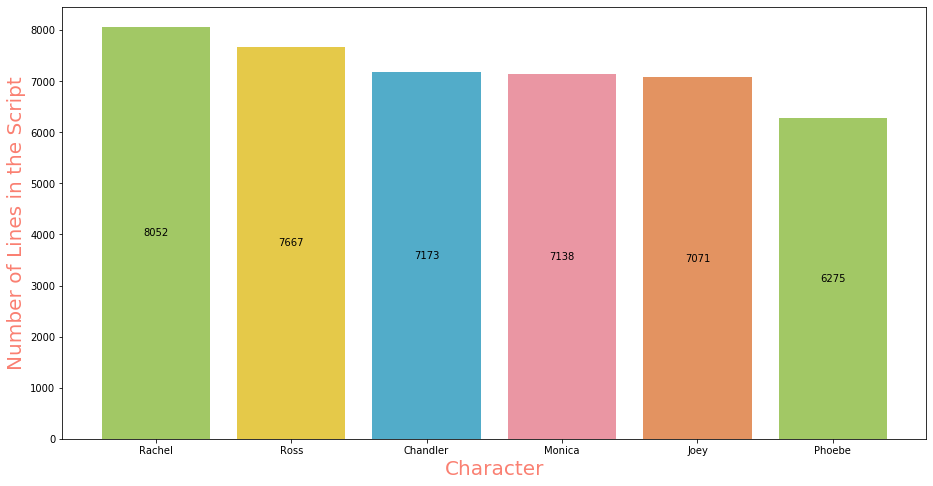

In [49]:
fig = plt.figure(figsize=(12,6))


x = ['Rachel','Ross','Chandler','Monica','Joey','Phoebe']
y = [ross_num, rachel_num,chandler_num,joey_num,monica_num,phoebe_num]
y.sort(reverse=True)
ax = fig.add_axes([0,0,1,1])

rects = plt.bar(x,y, width=0.8,color=['#A2C865','#E5C949','#52ACC9','#EA96A3','#E39361'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height/2),
                    ha='center', va='center')

ax.set_xlabel('Character', fontsize=20, color='salmon')
ax.set_ylabel('Number of Lines in the Script', fontsize=20, color='salmon')
autolabel(rects)

plt.savefig('num_lines_summary.png', bbox_inches = 'tight')

In [1]:
character_list = ['Ross','Rachel','Chandler','Joey','Monica','Phoebe']

In [17]:
df = pd.DataFrame(0, index=character_list, columns=character_list)

In [28]:
import re

filenames = ['Dialogues/clean_ross_list.txt','Dialogues/clean_rachel_list.txt',
             'Dialogues/clean_chandler_list.txt','Dialogues/clean_joey_list.txt',
             'Dialogues/clean_monica_list.txt','Dialogues/clean_phoebe_list.txt']

for i, file in zip(character_list, filenames):
    
    num_ross_mentions = 0
    num_rachel_mentions = 0
    num_chandler_mentions = 0
    num_joey_mentions = 0
    num_monica_mentions = 0
    num_phoebe_mentions = 0

    f = open(file,'r',encoding='utf-8')
    for line in f:
        if re.search(r'ross', str(line.lower())):
            num_ross_mentions += 1
        if re.search(r'rachel', str(line.lower())):
            num_rachel_mentions += 1
        if re.search(r'chandler', str(line.lower())):
            num_chandler_mentions += 1
        if re.search(r'joey', str(line.lower())):
            num_joey_mentions += 1
        if re.search(r'monica', str(line.lower())):
            num_monica_mentions += 1
        if re.search(r'phoebe', str(line.lower())):
            num_phoebe_mentions += 1 
    
    if (i == 'Ross'):
        df['Ross']['Ross'] = 0
        df['Ross']['Rachel'] = num_rachel_mentions
        df['Ross']['Chandler'] = num_chandler_mentions
        df['Ross']['Joey'] = num_joey_mentions
        df['Ross']['Monica'] = num_monica_mentions
        df['Ross']['Phoebe'] = num_phoebe_mentions
        
    if (i == 'Rachel'):
        df['Rachel']['Ross'] = num_ross_mentions
        df['Rachel']['Rachel'] = 0
        df['Rachel']['Chandler'] = num_chandler_mentions
        df['Rachel']['Joey'] = num_joey_mentions
        df['Rachel']['Monica'] = num_monica_mentions
        df['Rachel']['Phoebe'] = num_phoebe_mentions
        
    if (i == 'Chandler'):
        df['Chandler']['Ross'] = num_ross_mentions
        df['Chandler']['Rachel'] = num_rachel_mentions
        df['Chandler']['Chandler'] = 0
        df['Chandler']['Joey'] = num_joey_mentions
        df['Chandler']['Monica'] = num_monica_mentions
        df['Chandler']['Phoebe'] = num_phoebe_mentions
        
    if (i == 'Joey'):
        df['Joey']['Ross'] = num_ross_mentions
        df['Joey']['Rachel'] = num_rachel_mentions
        df['Joey']['Chandler'] = num_chandler_mentions
        df['Joey']['Joey'] = 0
        df['Joey']['Monica'] = num_monica_mentions
        df['Joey']['Phoebe'] = num_phoebe_mentions
        
    if (i == 'Monica'):
        df['Monica']['Ross'] = num_ross_mentions
        df['Monica']['Rachel'] = num_rachel_mentions
        df['Monica']['Chandler'] = num_chandler_mentions
        df['Monica']['Joey'] = num_joey_mentions
        df['Monica']['Monica'] = 0
        df['Monica']['Phoebe'] = num_phoebe_mentions
       
    if (i == 'Phoebe'):
        df['Phoebe']['Ross'] = num_ross_mentions
        df['Phoebe']['Rachel'] = num_rachel_mentions
        df['Phoebe']['Chandler'] = num_chandler_mentions
        df['Phoebe']['Joey'] = num_joey_mentions
        df['Phoebe']['Monica'] = num_monica_mentions
        df['Phoebe']['Phoebe'] = 0

In [29]:
df

,Ross,Rachel,Chandler,Joey,Monica,Phoebe
Ross,0,564,264,382,241,217
Rachel,341,0,124,201,271,231
Chandler,222,195,0,370,418,188
Joey,266,374,321,0,257,200
Monica,185,314,333,176,0,272
Phoebe,137,275,106,123,311,0


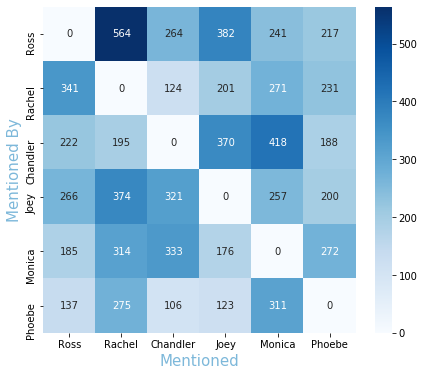

In [62]:
fig = plt.figure(figsize=(7,6))

sns.heatmap(df, annot=True, cmap='Blues',fmt='g')

plt.xlabel('Mentioned', fontsize=15, color='#7DB8DA')
plt.ylabel('Mentioned By', fontsize=15, color='#7DB8DA')
plt.savefig('mention_freq_heatmap.png', bbox_inches = 'tight')

In [47]:
ross_sum_of_mentions = df['Ross'].sum()
rachel_sum_of_mentions = df['Rachel'].sum()
chandler_sum_of_mentions = df['Chandler'].sum()
joey_sum_of_mentions = df['Joey'].sum()
monica_sum_of_mentions = df['Monica'].sum()
phoebe_sum_of_mentions = df['Phoebe'].sum()

sum_of_mentions_list = [ross_sum_of_mentions,rachel_sum_of_mentions,chandler_sum_of_mentions,
                        joey_sum_of_mentions, monica_sum_of_mentions, phoebe_sum_of_mentions]

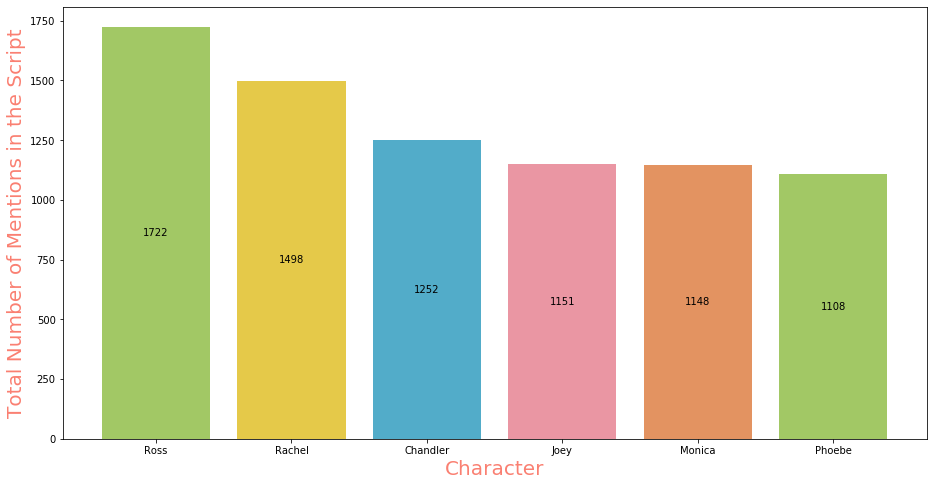

In [67]:
fig = plt.figure(figsize=(12,6))
x = ['Ross','Rachel','Chandler','Joey','Monica','Phoebe']
y = sum_of_mentions_list
y.sort(reverse=True)
ax = fig.add_axes([0,0,1,1])

rects = plt.bar(x,y, width=0.8,color=['#A2C865','#E5C949','#52ACC9','#EA96A3','#E39361'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height/2),
                    ha='center', va='center')

ax.set_xlabel('Character', fontsize=20, color='salmon')
ax.set_ylabel('Total Number of Mentions in the Script', fontsize=20, color='salmon')
autolabel(rects)

plt.savefig('num_of_mentions_summary.png', bbox_inches = 'tight')

In [147]:
catchphrases = ["How you doin'",'Smelly Cat','We were on a break','Dinosaur']

In [158]:
num_catchphrase_0 = 0 # How you doin
num_catchphrase_1 = 0 # Smelly cat
num_catchphrase_2 = 0 # We were on a break 
num_catchphrase_3 = 0

for file in filenames:
    f = open(file,'r',encoding='utf-8')
    for line in f:
        
        " ".join(line.split())
        
        if re.findall(r'how you doin', str(line.lower())):
            num_catchphrase_0 += len(re.findall(r'how you doin', str(line.lower())))
            
        if re.findall(r'smelly cat', str(line.lower())):
            num_catchphrase_1 += len(re.findall(r'smelly cat', str(line.lower())))
            
        if re.findall(r'we were on a break', str(line.lower())):
            num_catchphrase_2 += len(re.findall(r'we were on a break', str(line.lower())))
        
        if re.findall(r'dinosaur', str(line.lower())):
            num_catchphrase_3 += len(re.findall(r'dinosaur', str(line.lower())))

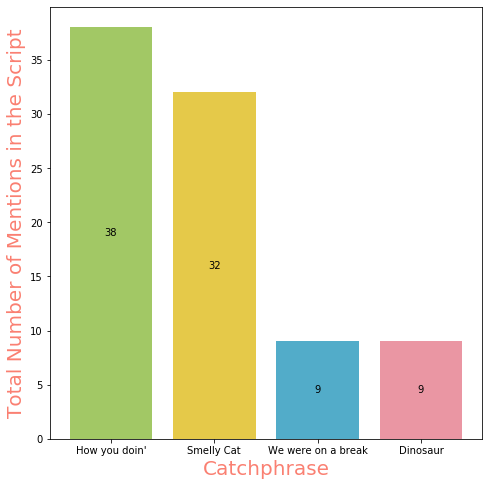

In [159]:
fig = plt.figure(figsize=(6,6))
x = catchphrases
y = [num_catchphrase_0,num_catchphrase_1,num_catchphrase_2,num_catchphrase_3]
y.sort(reverse=True)
ax = fig.add_axes([0,0,1,1])

rects = plt.bar(x,y, width=0.8,color=['#A2C865','#E5C949','#52ACC9','#EA96A3','#E39361'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height/2),
                    ha='center', va='center')

ax.set_xlabel('Catchphrase', fontsize=20, color='salmon')
ax.set_ylabel('Total Number of Mentions in the Script', fontsize=20, color='salmon')
autolabel(rects)

plt.savefig('catchphrase_freq.png', bbox_inches = 'tight')